<a href="https://colab.research.google.com/github/ColstonBod-oy/CCS7-TensorFlowDemos/blob/main/CCS7_Regression_Model_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using TensorFlow to solve a Regression Problem**

This activity looks at how Regression Models are implemented in order to analyze a given set of data and make predictions. You will be testing the code on a given set of data, and then adjusting the data try and find trends or connections between variables. As you try out the application, take note of the guide questions that are spread out in the activity. Set up and run the sample code below then analyze the different components and how they work to be able to generate data for a regression problem. 

**Each of the guide questions must be answered in 150 to 300 words each.**

**Make sure to click "File" and then "Save a Copy in Drive" before making any changes to the demo.**

# **TensorFlow Regression Model Demo**

**Setting up the required libraries for the TensorFlow Code**

In [1]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import io

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


**Preparing the data for analysis**

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Life Expectancy Data.csv to Life Expectancy Data.csv


In [5]:
raw_data = pd.read_csv(io.BytesIO(uploaded['Life Expectancy Data.csv']))

In [7]:
dataset = raw_data.copy()
dataset.tail()

,Country,Year,Status,Life Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


**Remove the invalid data from the dataset**
*   **Guide Question 1:** How do we **select our data to be predicted as the first step** in the regression model?

In [8]:
dataset.isna().sum()

Country                              0
Year                                 0
Status                               0
Life Expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
dataset = dataset.dropna()

In [10]:
dataset = dataset.drop(['Country', 'Status'], axis=1)

**Splitting the data into the training and test sets**
*   **Guide Question 2:** What is the use of **splitting the training and testing data**?
*   **Guide Question 3:** What is the **training data** supposed to be? Discuss the uses of the training data.
*   **Guide Question 4:** What is the **testing data** supposed to be? Discuss the uses of the testing data.

In [11]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

**Inspecting the data**

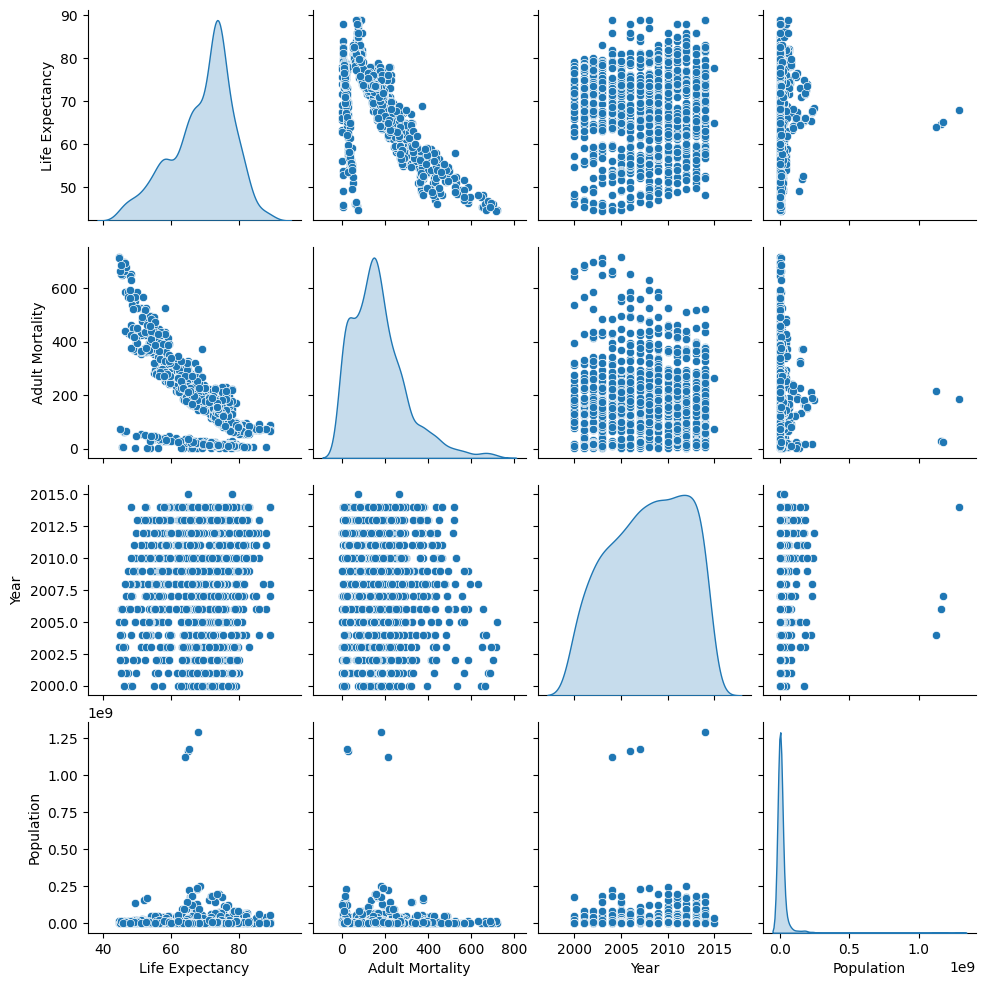

In [12]:
sns.pairplot(train_dataset[['Life Expectancy', 'Adult Mortality', 'Year', 'Population']], diag_kind='kde')

**Splitting the features from the label**

In [13]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Life Expectancy')
test_labels = test_features.pop('Life Expectancy')

**Normalizing the data**
*   **Guide Question 5:** Describe what **Normalizing** does and how it affects the data of a regression model.

In [14]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [15]:
normalizer.adapt(np.array(train_features))

In [16]:
print(normalizer.mean.numpy())

[[    2007.883      169.851       34.548        4.526      723.189
        79.112     2506.603       37.85        46.613       83.864
         5.97        84.496        2.068     5725.716 15021572.
         4.829        4.929        0.632       12.103]]


In [17]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First Example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First Example: [[   2008.       427.         2.         6.56     476.86      94.
        0.        34.2        3.        96.         5.55      96.
       12.7     5623.38 1946351.         8.8        8.6        0.65
       12.1 ]]

Normalized: [[ 0.03  2.01 -0.26  0.51 -0.14  0.58 -0.23 -0.18 -0.26  0.55 -0.18  0.55
   1.72 -0.01 -0.18  0.86  0.78  0.08 -0.  ]]


**Simple Linear Regression using the "Year" feature**
*   **Guide Question 6:** Describe what is a **Sequential Model** and how it is used. Describe what parameters or characteristics this model has and how it compares to existing models.
*   **Guide Question 7:** Describe what is the **Epoch** and how it affects the regression model. What is considered an "optimal" Epoch? What is **overfitting** and **underfitting** and how does it relate to an Epoch?
*   **Guide Question 8:** Describe the **Mean Squared Error (MSE)** and how it is used to calculate the accuracy of a given regression model. What is considered a "good" MSE?

In [18]:
year = np.array(train_features['Year'])

year_normalizer = layers.Normalization(input_shape=[1,], axis=None)
year_normalizer.adapt(year)

In [19]:
simple_model = tf.keras.Sequential([
    year_normalizer,
    layers.Dense(units=1)
])

simple_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [20]:
simple_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [21]:
%%time
history = simple_model.fit(
    train_features['Year'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 11.9 s, sys: 409 ms, total: 12.3 s
Wall time: 15.7 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,7.016941,7.014243,95
96,7.022216,7.014050,96
97,7.015511,7.005821,97
98,7.013775,6.996456,98
99,7.018934,7.004429,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Life Expectancy]')
  plt.legend()
  plt.grid(True)

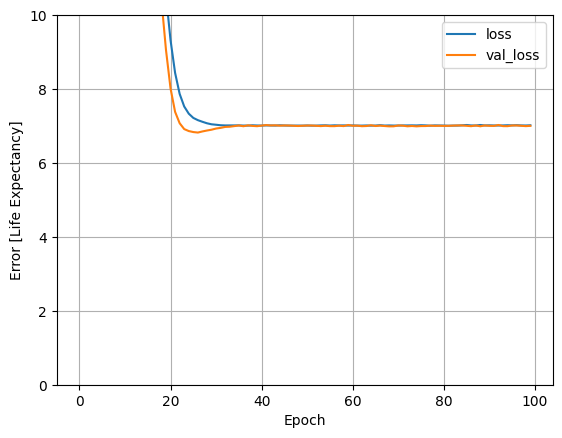

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results['simple_model'] = simple_model.evaluate(
    test_features['Year'],
    test_labels, verbose=0)

In [ ]:
x = tf.linspace(2000, 2015, 50)
y = simple_model.predict(x)

2/2 [==============================] - 0s 8ms/step


In [ ]:
def plot_year(x, y):
  plt.scatter(train_features['Year'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Year')
  plt.ylabel('Life Expectancy')
  plt.legend()

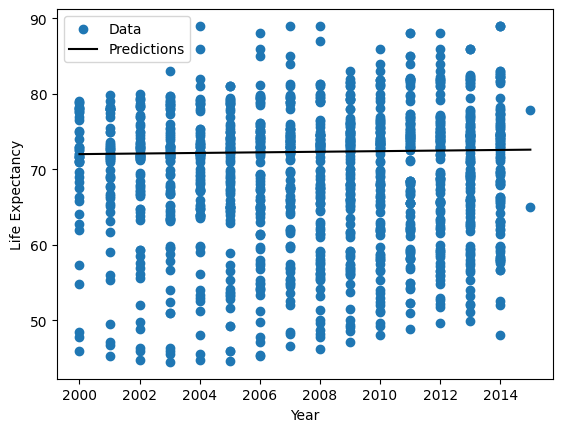

In [ ]:
plot_year(x, y)

**Multiple Linear Regression using all features**

In [ ]:
multiple_linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
multiple_linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 60ms/step


array([[ 1.362],
       [ 0.491],
       [ 1.312],
       [ 2.575],
       [-0.268],
       [-2.817],
       [ 3.19 ],
       [-0.234],
       [ 3.42 ],
       [-0.919]], dtype=float32)

In [ ]:
multiple_linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(19, 1) dtype=float32, numpy=
array([[ 0.041],
       [ 0.465],
       [-0.137],
       [-0.371],
       [-0.19 ],
       [ 0.039],
       [-0.037],
       [-0.529],
       [ 0.368],
       [ 0.061],
       [-0.041],
       [ 0.456],
       [ 0.46 ],
       [-0.207],
       [ 0.225],
       [-0.181],
       [-0.449],
       [-0.266],
       [ 0.145]], dtype=float32)>

In [ ]:
multiple_linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = multiple_linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 10.4 s, sys: 447 ms, total: 10.9 s
Wall time: 10.9 s


In [ ]:
test_results['multiple_linear_model'] = multiple_linear_model.evaluate(
    test_features, test_labels, verbose=0)

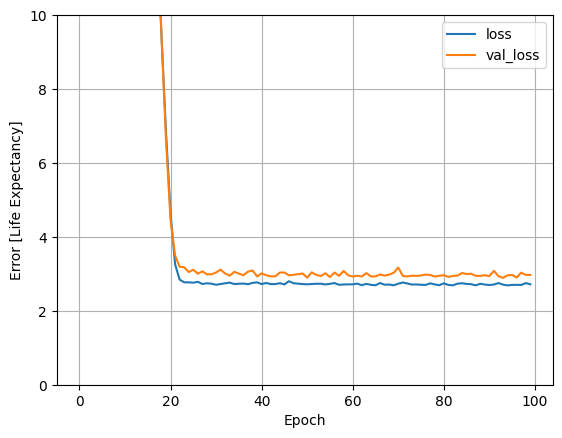

In [ ]:
plot_loss(history)

In [ ]:
pd.DataFrame(test_results, index=['Mean Absolute Error [Life Expectancy]']).T

,Mean Absolute Error [Life Expectancy]
simple_model,6.373505
multiple_linear_model,3.179897
